In [1]:
import os
from PIL import Image
import torch

from diffusion.controlnet import ControlNetModel
from diffusion.pipeline_controlnet import StableDiffusionControlNetPipeline
from diffusers import UniPCMultistepScheduler
from diffusers.utils import load_image

device = "cuda:0"

/root/miniconda3/envs/cs492d/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Set model paths

In [8]:
base_model_path = "runwayml/stable-diffusion-v1-5"      # NOTE: set as the base Stable Diffusion model
controlnet_path = "./runs/controlnet_dogs"           # NOTE: set as the output directory of your ControlNet training

### Load models and scheduler

In [9]:
# Load ControlNet
controlnet = ControlNetModel.from_pretrained(
    controlnet_path, 
    torch_dtype=torch.float16
)
# Load Stable Diffusion with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    base_model_path, 
    controlnet=controlnet, 
    torch_dtype=torch.float16,
    safety_checker=None,
)
# Set scheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Load model to GPU
pipe.to(device)

Loading pipeline components...: 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]
You have disabled the safety checker for <class 'diffusion.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.28.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusion.controlnet",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "UniPCMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Load condition for ControlNet

/root/Diffusion-Assignment3-ControlNet-LoRA/task_1_controlnet/data_2/test_conditions/


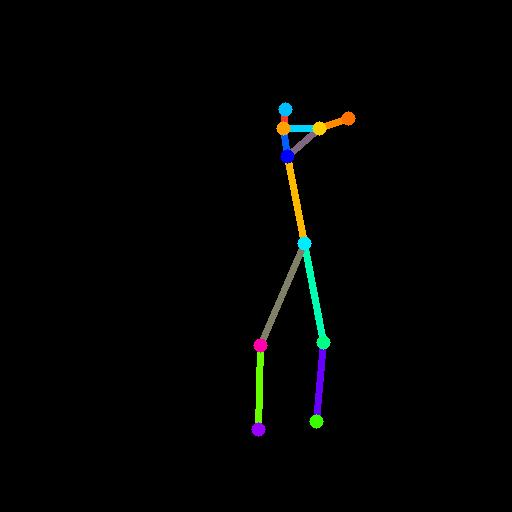

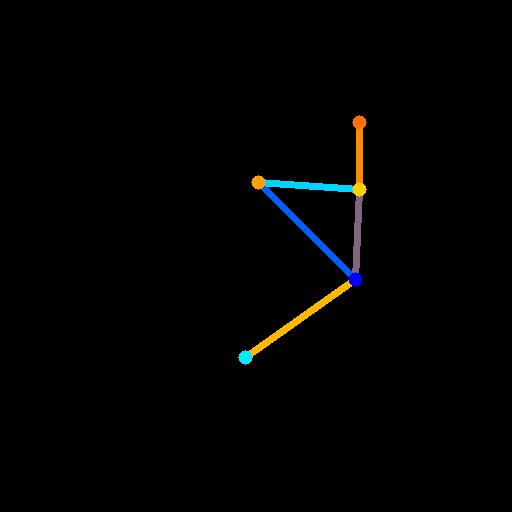

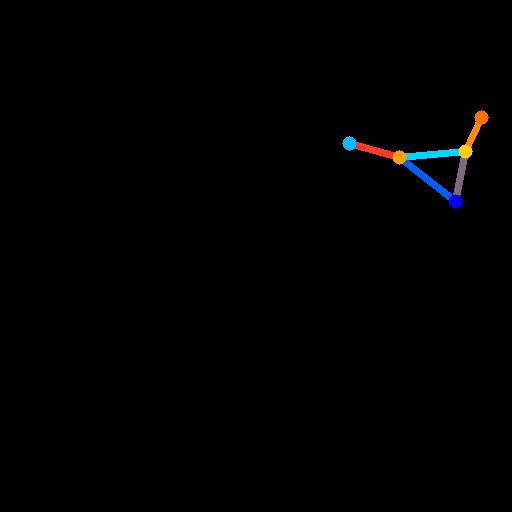

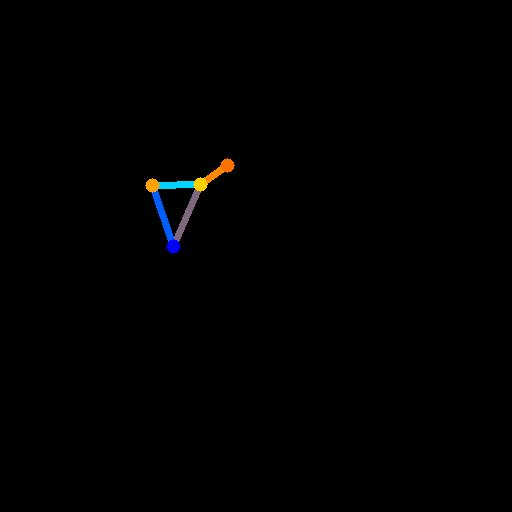

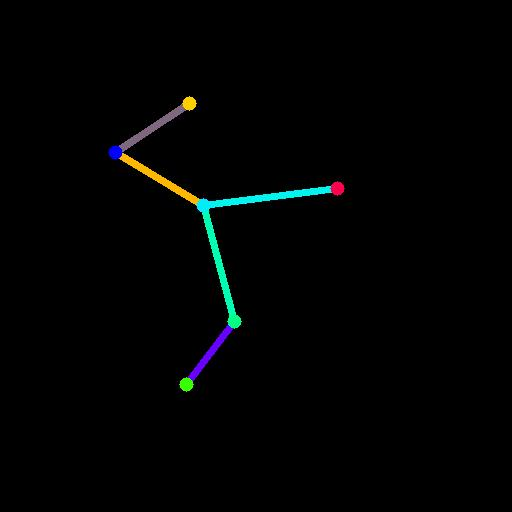

In [12]:

# control_image = load_image("./data_2/conditioning_image_2.png")

# prompt = "dog flying the air"

path = os.getcwd()

cond_path = "data_2/test_conditions/"

path = os.path.join(path, cond_path)

print(path)

image_files = []
for file in os.listdir(path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    full_file_path = os.path.join(path, file)

    if os.path.isfile(full_file_path) and any(file.lower().endswith(ext) for ext in image_extensions):

        image_files.append(full_file_path)


for image in image_files:
    img = load_image(image)
    img.show()



# print(f"Prompt: {prompt}")
# control_image

100%|██████████| 20/20 [00:01<00:00, 12.37it/s]


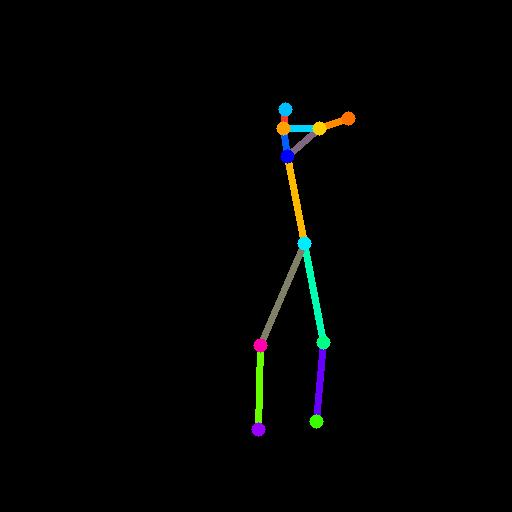

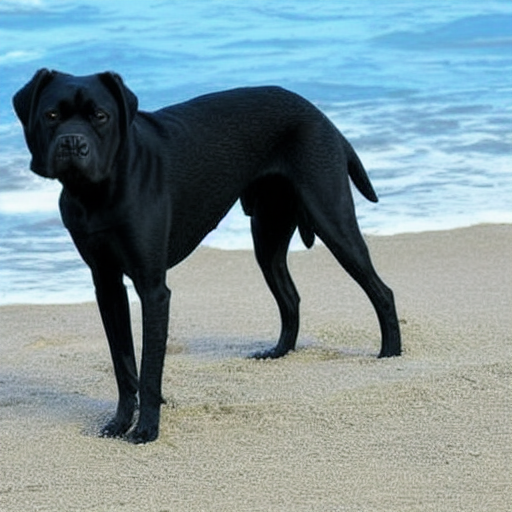

100%|██████████| 20/20 [00:01<00:00, 12.72it/s]


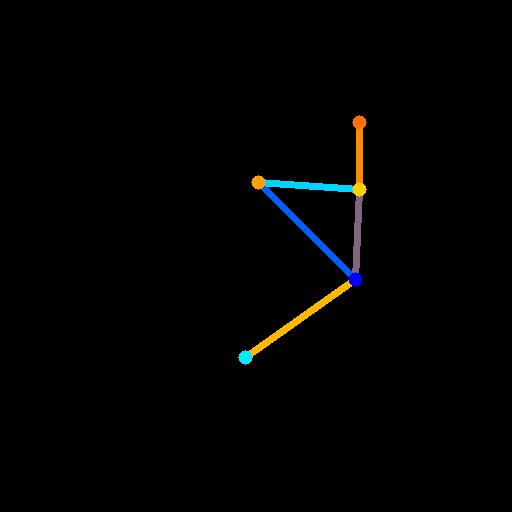

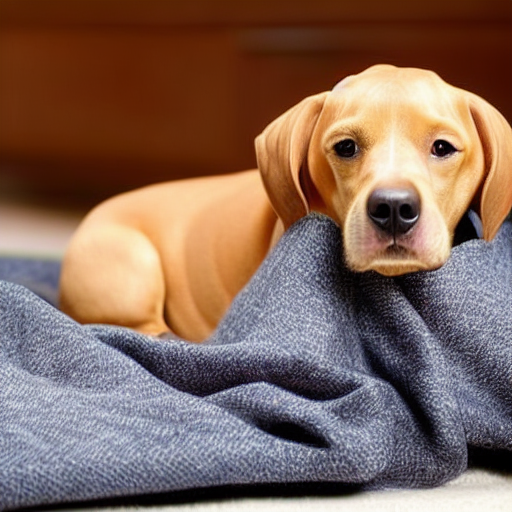

100%|██████████| 20/20 [00:01<00:00, 12.65it/s]


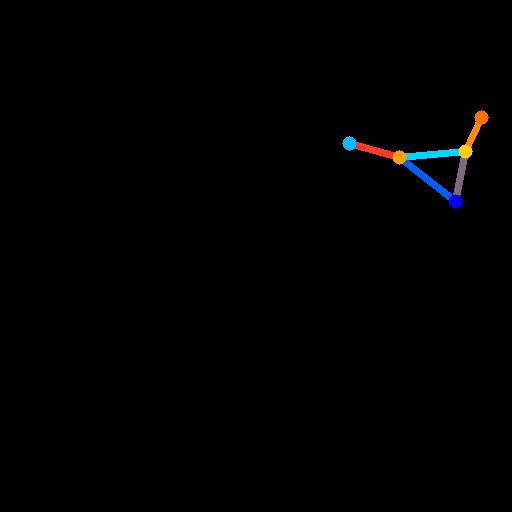

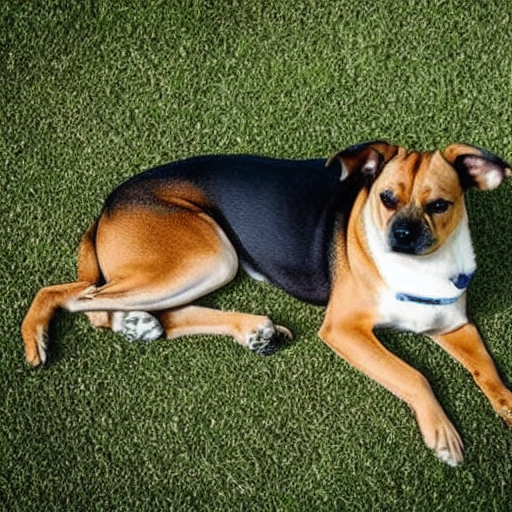

100%|██████████| 20/20 [00:01<00:00, 12.49it/s]


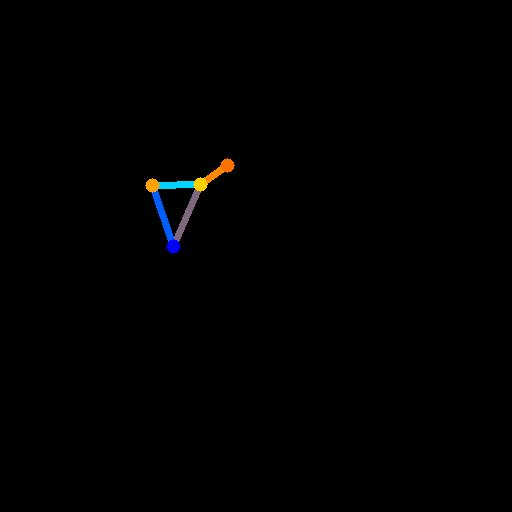

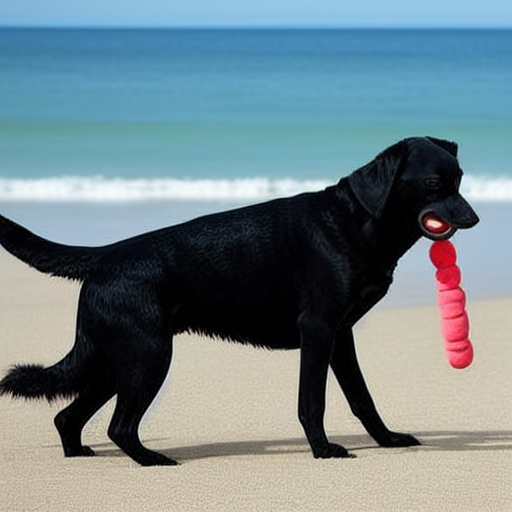

100%|██████████| 20/20 [00:01<00:00, 12.49it/s]


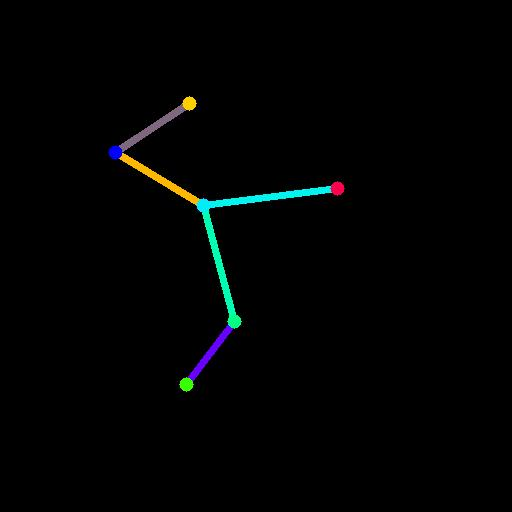

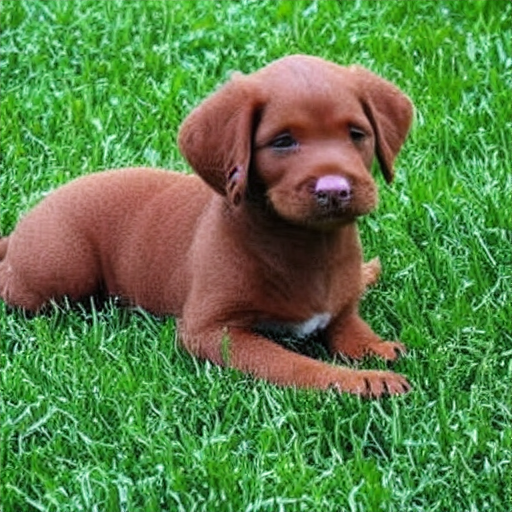

In [13]:
seed = 10
generator = torch.manual_seed(seed)
prompts = ['a black dog standing on the beach', 'a dog is sitting in a blanket', 'a dog laying on the ground with its head down', 'a black dog with a toy in its mouth on the beach', 'a brown puppy sitting in the grass']

# Generate image
for i, prompt in enumerate(prompts):
    
    image = pipe(
        prompt, 
        num_inference_steps=20, 
        generator=generator, 
        image=load_image(image_files[i])
    ).images[0]

    image.save(f"{path}/{prompt}.jpg")
    cond_img = load_image(image_files[i])
    cond_img.show()
    image.show()